In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

In [2]:
#parameter setting
amp=1                      #진폭
sr=10000
dur=0.5
freq=440.0

In [3]:
theta = np.arange(0,2*np.pi)   #단위는 radian
                               #pi=3.14니까 대충 6.28어쩌고
theta

array([0., 1., 2., 3., 4., 5., 6.])

In [4]:
s=np.sin(theta)
s

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ])

Text(0,0.5,'value')

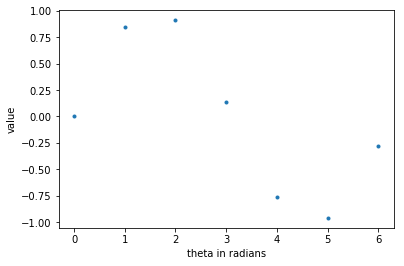

In [7]:
fig=plt.figure()
ax=fig.add_subplot(111)      #figure는 화면 전체.
ax.plot(theta, s, '.')       #7개의 theta 값이 있으니 corresponding 값도 7개
                             #s는 sin함수
ax.set_xlabel('theta in radians')
ax.set_ylabel('value')

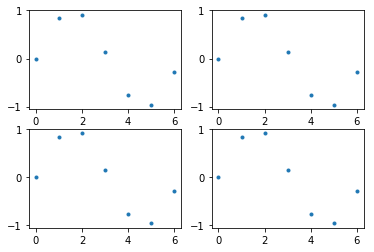

In [6]:
#221= 2행 2열, 1,2,3,4 subplot. 왼쪽 위1, 오른쪽 위2, 왼쪽 아래3, 오른쪽 아래4

fig=plt.figure()
ax=fig.add_subplot(221)
ax.plot(theta, s, '.')
ax=fig.add_subplot(222)
ax.plot(theta, s, '.')
ax=fig.add_subplot(223)
ax.plot(theta, s, '.')
ax=fig.add_subplot(224)
ax.plot(theta, s, '.')

In [7]:
#더 빽빽하게 만들려면
theta = np.arange(0,2*np.pi, 0.1)   #위에거는 np.arnage(0.2*np.pi) --> 1 단위로 쪼갬. 바꾼 식은 0.1씩 쪼갬
theta

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2])

<IPython.core.display.Javascript object>


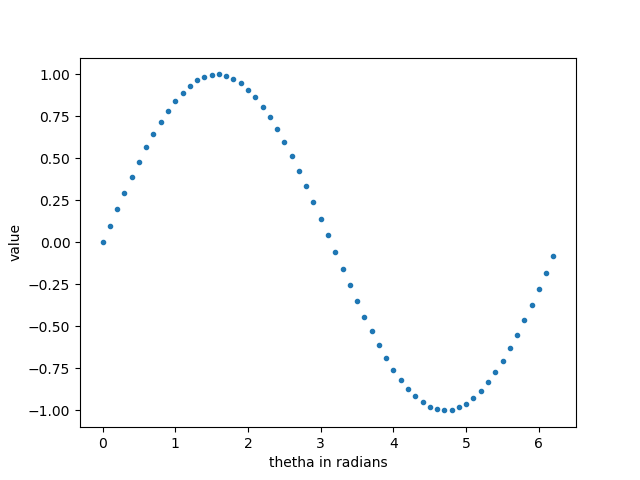

Text(0, 0.5, 'value')

In [46]:
s=np.sin(theta)

fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(theta,s,'.')
ax.set_xlabel('thetha in radians')
ax.set_ylabel('value')

#linear하면 x변화와 y변화는 모두 equidistant: line처럼 생긴 것
#현재는 x값은 equidistnat하지만 y는 아님

In [9]:
#여기 위까지는 time 개념이 없었고 theta부터 직접 만든 것
#아래 거는 타임 먼저 만들고 하는 것

In [8]:
#t=np.arange(1,sr*dur)   얘는 시간 개념을 먼저 넣어준 것. 근데 여기는 time tic을 준 거고, '몇 초'로 만들려면 sr로 나눔
t=np.arange(1,sr*dur+1)/sr     #마지막것 포함해줬고 더하기 일 함으로서, sr로 나눠주면서 초 개념 생성

In [9]:
theta=t*2*np.pi*freq     #freq는 몇 바퀴인지

In [10]:
#generate signal by cosine-phasor
s=amp*np.sin(theta)

<IPython.core.display.Javascript object>


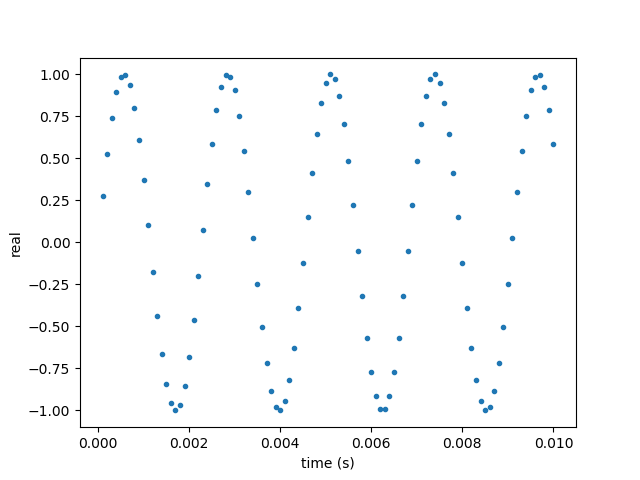

Text(0, 0.5, 'real')

In [13]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(t[0:100],s[0:100],'.')      #0~1000 안 정하면 너무 빽빽해서 태극문양이 안 보임
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

#2차원 벡터로 표현. 여기있는 점들의 개수는 1000개.

In [12]:
ipd.Audio(s,rate=sr)

In [35]:
#generate signal by complex-phasor
c=amp*np.exp(theta*1j)         #np.exp = e라고 생각하면 됨. 오일러식에 나오는. 1j는 i임. 허수 뜻하는;
c

#결국 다 고정이고 theta값만 바뀜

array([1.9842294 +2.50666467e-01j, 1.93716632+4.97379774e-01j,
       1.85955297+7.36249105e-01j, ..., 1.93716632-4.97379774e-01j,
       1.9842294 -2.50666467e-01j, 2.        +7.85754689e-15j])

<IPython.core.display.Javascript object>


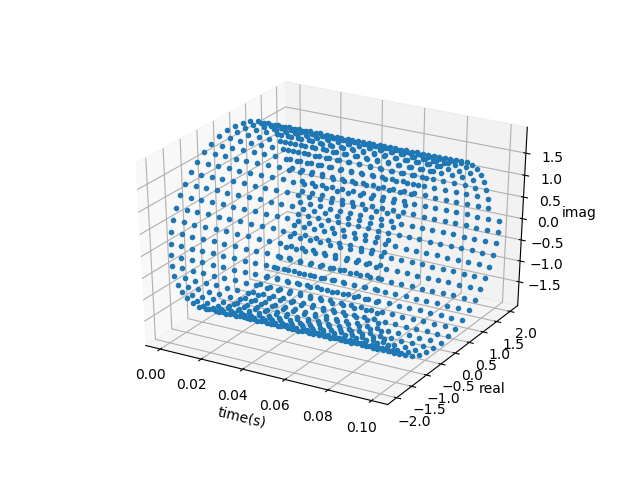

Text(0.5, 0, 'imag')

In [51]:
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.plot(t[0:1000],c.real[0:1000],c.imag[0:1000], '.')
ax.set_xlabel('time(s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')
#원통 모형으로 봤을 때 반지름이 1(amp 값임)

In [16]:
#ipd.Audio(s,rate=sr)
#이거는
ipd.Audio(c.real,rate=sr)
#이랑 같음

In [52]:
#!pip install sounddevice
import sounddevice as sd
sd.play(c.real,sr)